ASSIGNMENT

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("global_income_inequality.csv")

In [3]:
df.head()

,Country,Year,Population,Gini Index,Average Income (USD),Top 10% Income Share (%),Bottom 10% Income Share (%),Income Group
0,United States,2000,30072337,0.333105,37106.735536,30.780946,1.096329,High Income
1,United States,2001,15189465,0.508761,16250.105075,54.563475,1.441728,Low Income
2,United States,2002,89001835,0.229093,40069.586399,37.200666,1.374502,High Income
3,United States,2003,297595139,0.230673,1233.469995,40.453246,4.493424,Lower Middle Income
4,United States,2004,23680558,0.544657,22950.248061,45.343660,3.250805,High Income


In [4]:
df.describe()

,Year,Population,Gini Index,Average Income (USD),Top 10% Income Share (%),Bottom 10% Income Share (%)
count,360.000000,3.600000e+02,360.000000,360.000000,360.000000,360.000000
mean,2011.500000,1.722251e+08,0.425757,35433.844535,40.200676,2.992700
std,6.931821,1.016954e+08,0.128095,20425.341602,11.495312,1.147626
min,2000.000000,5.493471e+06,0.200285,1031.459111,20.053225,1.022658
25%,2005.750000,7.873280e+07,0.317949,18655.898805,30.485922,1.994917
50%,2011.500000,1.754913e+08,0.429615,34470.820155,40.391369,2.975537
75%,2017.250000,2.541225e+08,0.538850,54259.988739,49.920101,4.025345
max,2023.000000,3.491768e+08,0.645261,69732.712622,59.939168,4.986443


UNIVARIATE ANALYSIS

In [6]:
top_5_gini = df[['Country', 'Year', 'Gini Index']].sort_values(by='Gini Index', ascending=False).head(5)
print(top_5_gini)

          Country  Year  Gini Index
194         Japan  2002    0.645261
86        Germany  2014    0.644025
339  Saudi Arabia  2003    0.642237
332     Australia  2020    0.639756
324     Australia  2012    0.639608


In [7]:
average_income_by_country = df.groupby('Country')['Average Income (USD)'].mean().sort_values(ascending=False)
print(average_income_by_country)

Country
Saudi Arabia      44323.702211
Germany           41476.979733
Canada            38353.672433
United States     37500.160556
South Africa      36051.172819
Russia            35913.437125
United Kingdom    35820.422852
India             35158.591883
Japan             34862.380925
China             34630.348055
Nigeria           34552.100370
Brazil            33313.785410
France            33042.399718
Australia         28969.693533
Mexico            27538.820407
Name: Average Income (USD), dtype: float64


In [9]:
income_group_distribution = df['Income Group'].value_counts()
print(income_group_distribution)

Income Group
High Income            104
Upper Middle Income     87
Low Income              85
Lower Middle Income     84
Name: count, dtype: int64


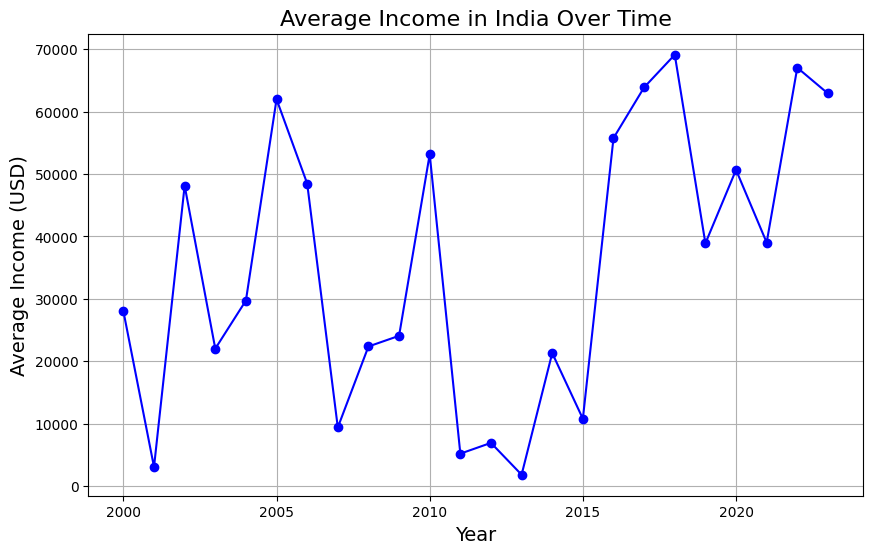

In [11]:
india_data = df[df['Country'] == 'India']

plt.figure(figsize=(10, 6))
plt.plot(india_data['Year'], india_data['Average Income (USD)'], marker='o', color='blue')

plt.title('Average Income in India Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Income (USD)', fontsize=14)
plt.grid(True)

plt.show()

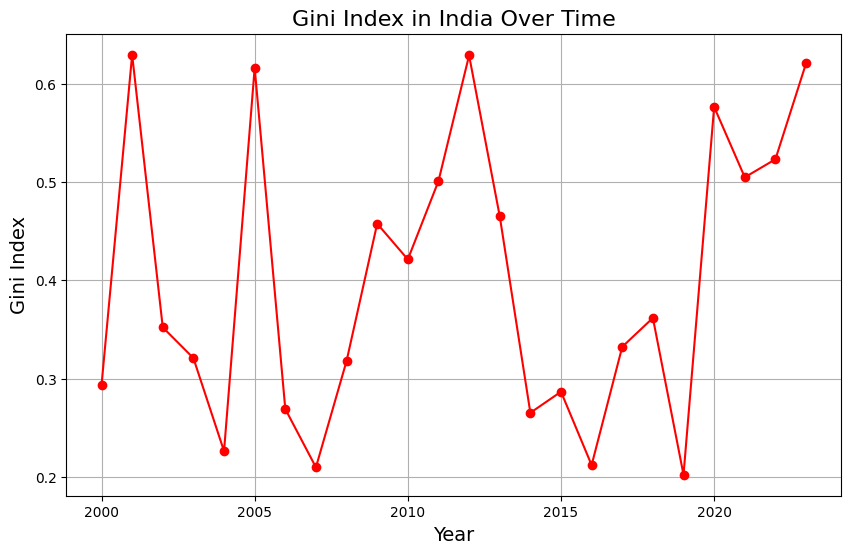

In [12]:
india_data = df[df['Country'] == 'India']

plt.figure(figsize=(10, 6))
plt.plot(india_data['Year'], india_data['Gini Index'], marker='o', color='red')

plt.title('Gini Index in India Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Gini Index', fontsize=14)
plt.grid(True)

plt.show()

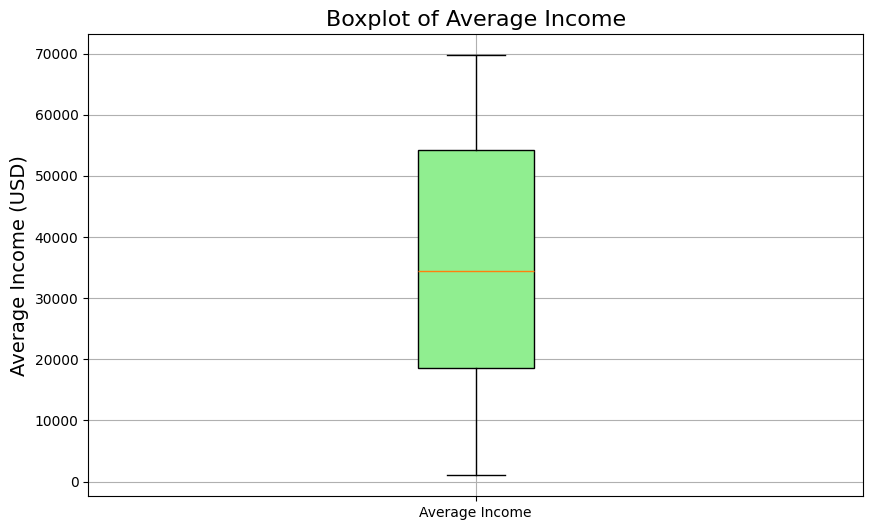

In [13]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Average Income (USD)'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))

plt.title('Boxplot of Average Income', fontsize=16)
plt.ylabel('Average Income (USD)', fontsize=14)
plt.xticks([1], ['Average Income']) 
plt.grid(True)

plt.show()

<Figure size 1200x800 with 0 Axes>

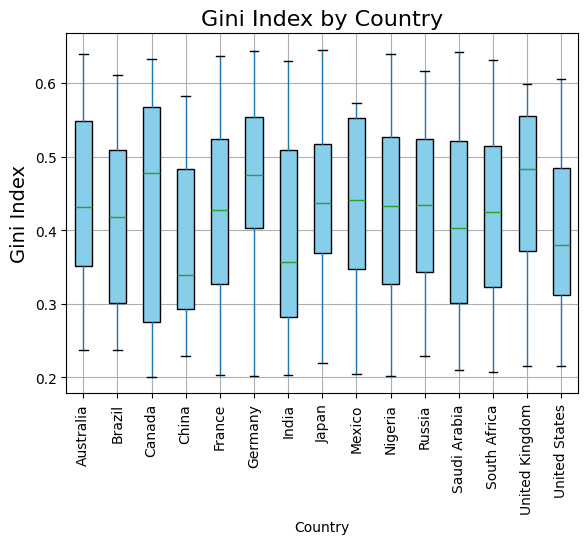

In [14]:
plt.figure(figsize=(12, 8))
df.boxplot(column='Gini Index', by='Country', grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

plt.title('Gini Index by Country', fontsize=16)
plt.suptitle('')  
plt.ylabel('Gini Index', fontsize=14)
plt.xticks(rotation=90)  
plt.grid(True)

plt.show()

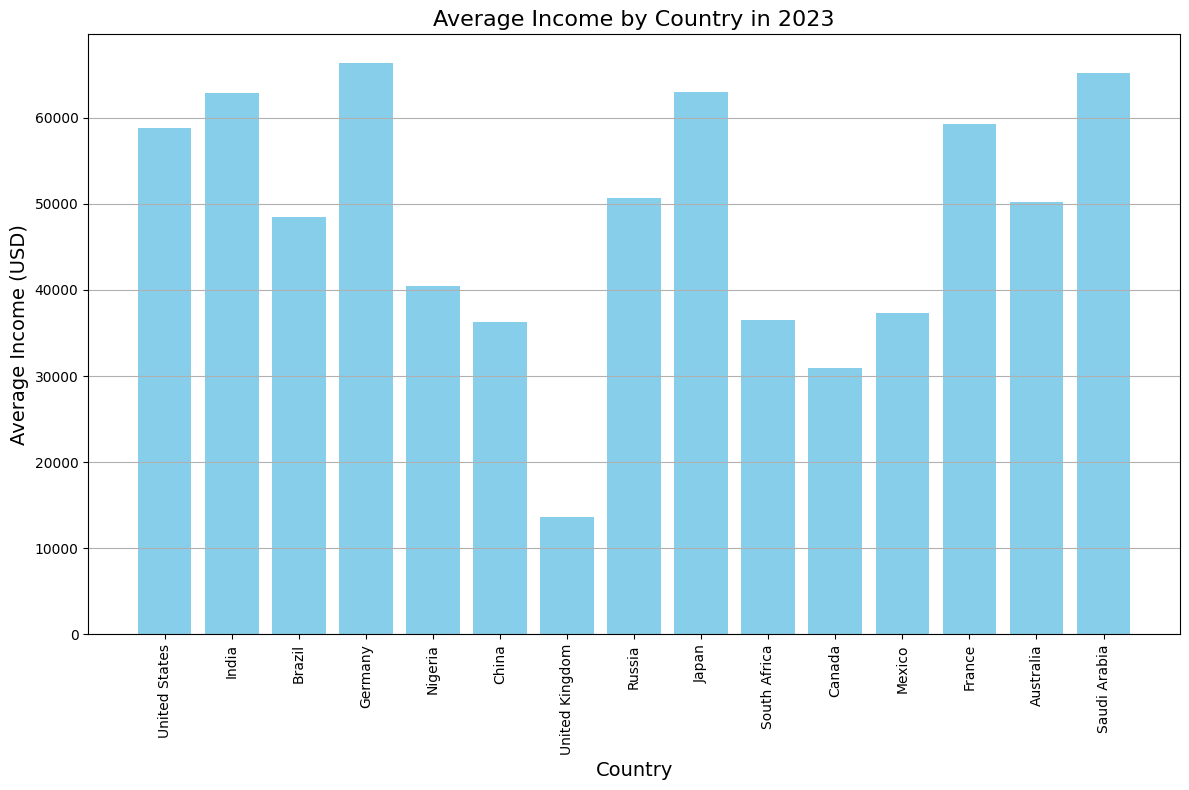

In [15]:
data_2023 = df[df['Year'] == 2023]

plt.figure(figsize=(12, 8))
plt.bar(data_2023['Country'], data_2023['Average Income (USD)'], color='skyblue')

plt.title('Average Income by Country in 2023', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Income (USD)', fontsize=14)
plt.xticks(rotation=90) 
plt.grid(axis='y')

plt.tight_layout() 
plt.show()

Frequency Distribution Table for Income Group:
Income Group
High Income            104
Upper Middle Income     87
Low Income              85
Lower Middle Income     84
Name: count, dtype: int64


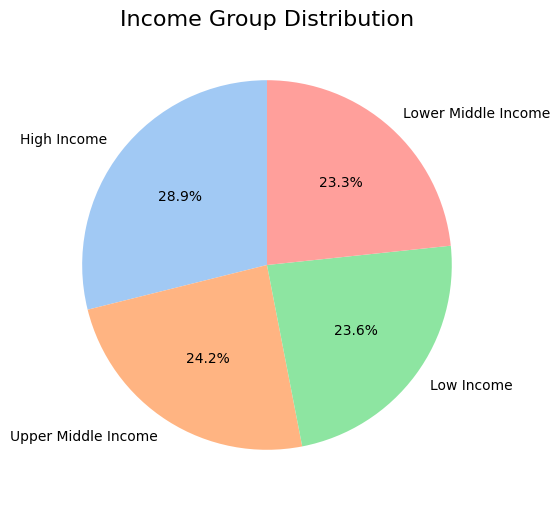

In [17]:
income_group_counts = df['Income Group'].value_counts()
print("Frequency Distribution Table for Income Group:")
print(income_group_counts)
plt.figure(figsize=(8, 6))
income_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Income Group Distribution', fontsize=16)
plt.ylabel('')  
plt.show()

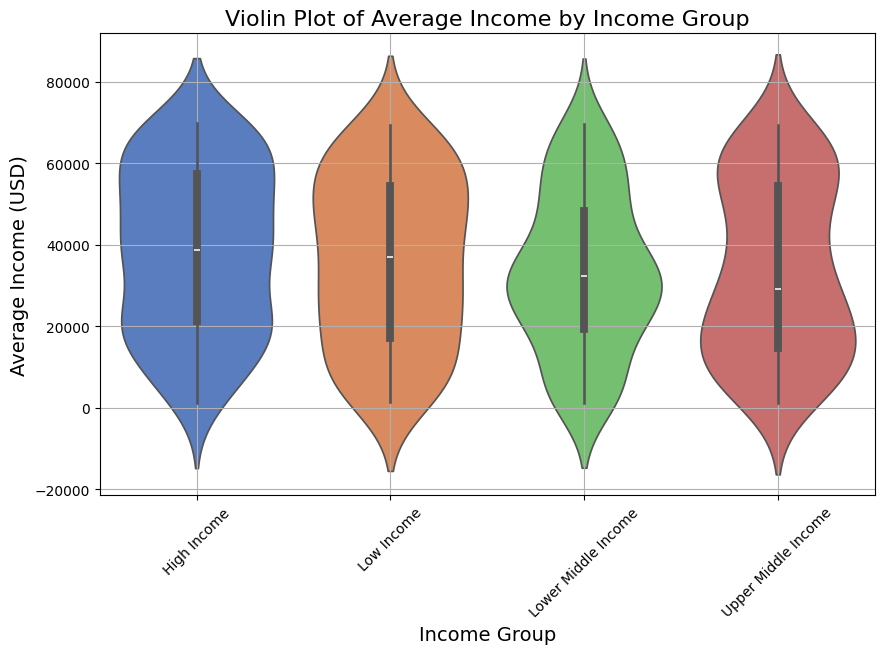

In [22]:
#Violin Plot for Average Income
plt.figure(figsize=(10, 6))
sns.violinplot(x='Income Group', y='Average Income (USD)', data=df, hue='Income Group', 
               palette="muted", legend=False)

plt.title('Violin Plot of Average Income by Income Group', fontsize=16)
plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Average Income (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

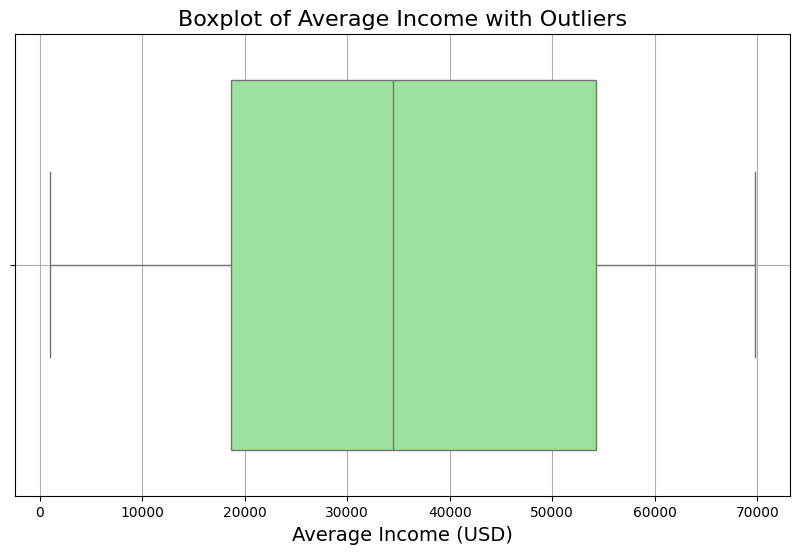

In [26]:
#Outlier Detection using IQR
Q1 = df['Average Income (USD)'].quantile(0.25)
Q3 = df['Average Income (USD)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Average Income (USD)'] < lower_bound) | (df['Average Income (USD)'] > upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Average Income (USD)'], color='lightgreen')
plt.title('Boxplot of Average Income with Outliers', fontsize=16)
plt.xlabel('Average Income (USD)', fontsize=14)
plt.grid(True)
plt.show()

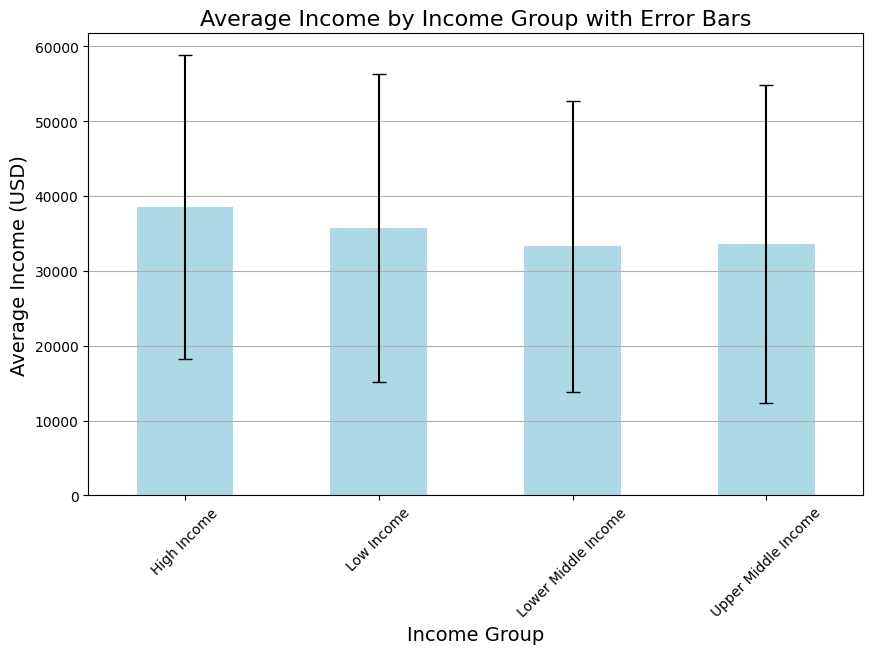

In [27]:
mean_income = df.groupby('Income Group')['Average Income (USD)'].mean()
std_income = df.groupby('Income Group')['Average Income (USD)'].std()

plt.figure(figsize=(10, 6))
mean_income.plot(kind='bar', yerr=std_income, color='lightblue', capsize=5)
plt.title('Average Income by Income Group with Error Bars', fontsize=16)
plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Average Income (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

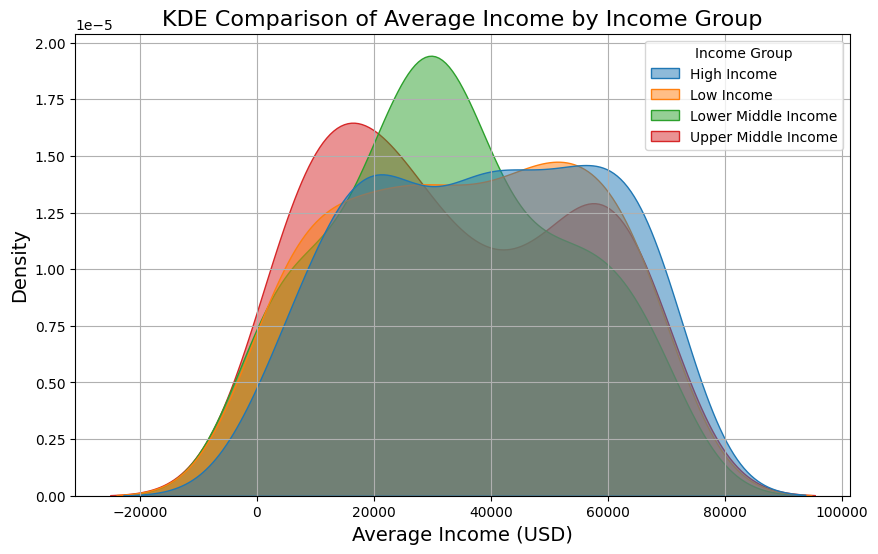

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Average Income (USD)', hue='Income Group', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE Comparison of Average Income by Income Group', fontsize=16)
plt.xlabel('Average Income (USD)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()


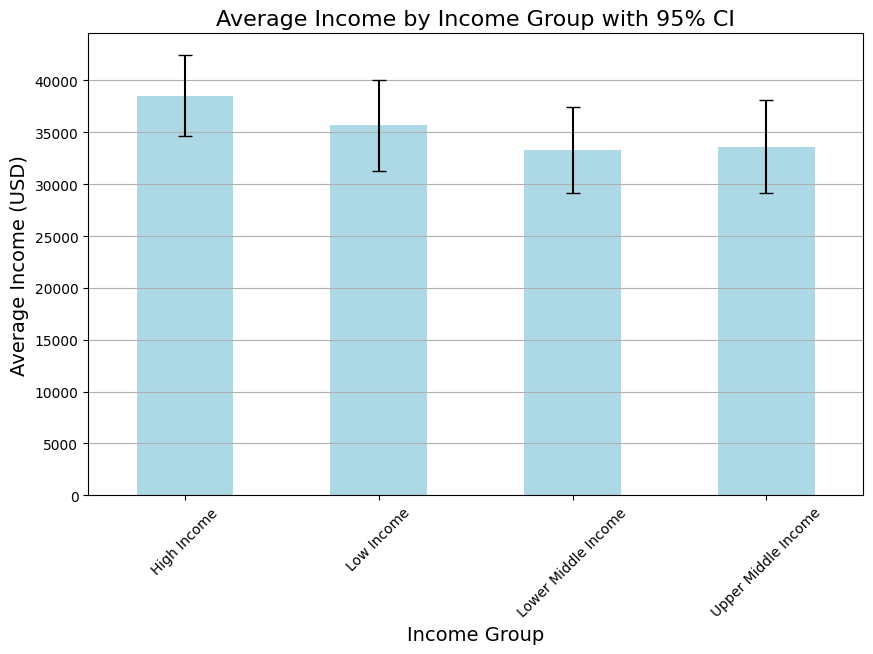

In [30]:
mean_income = df.groupby('Income Group')['Average Income (USD)'].mean()
std_income = df.groupby('Income Group')['Average Income (USD)'].std()
n = df.groupby('Income Group')['Average Income (USD)'].count()

ci = 1.96 * (std_income / np.sqrt(n))

plt.figure(figsize=(10, 6))
mean_income.plot(kind='bar', yerr=ci, capsize=5, color='lightblue')
plt.title('Average Income by Income Group with 95% CI', fontsize=16)
plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Average Income (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Outliers in Gini Index:
Empty DataFrame
Columns: [Country, Year, Population, Gini Index, Average Income (USD), Top 10% Income Share (%), Bottom 10% Income Share (%), Income Group]
Index: []


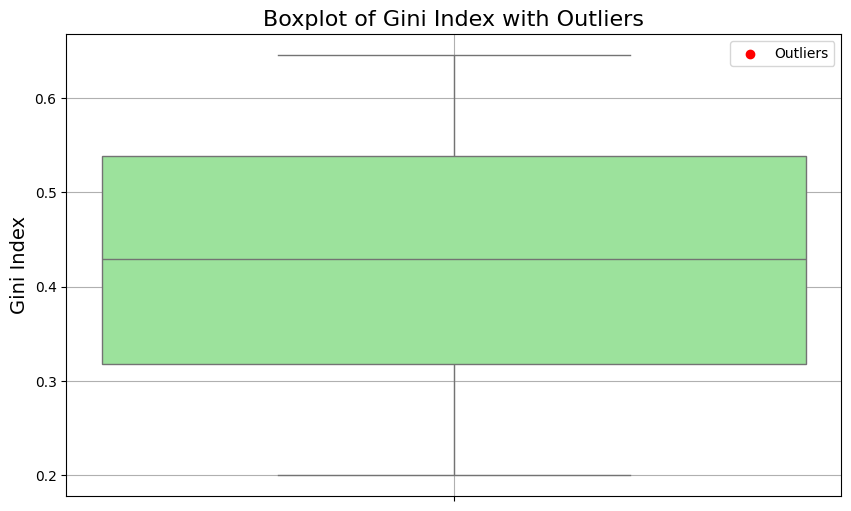

In [5]:
Q1 = df['Gini Index'].quantile(0.25)
Q3 = df['Gini Index'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Gini Index'] < lower_bound) | (df['Gini Index'] > upper_bound)]
print(f"\nOutliers in Gini Index:\n{outliers}")

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Gini Index'], color='lightgreen')
plt.scatter(outliers.index, outliers['Gini Index'], color='red', label='Outliers')
plt.title('Boxplot of Gini Index with Outliers', fontsize=16)
plt.ylabel('Gini Index', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

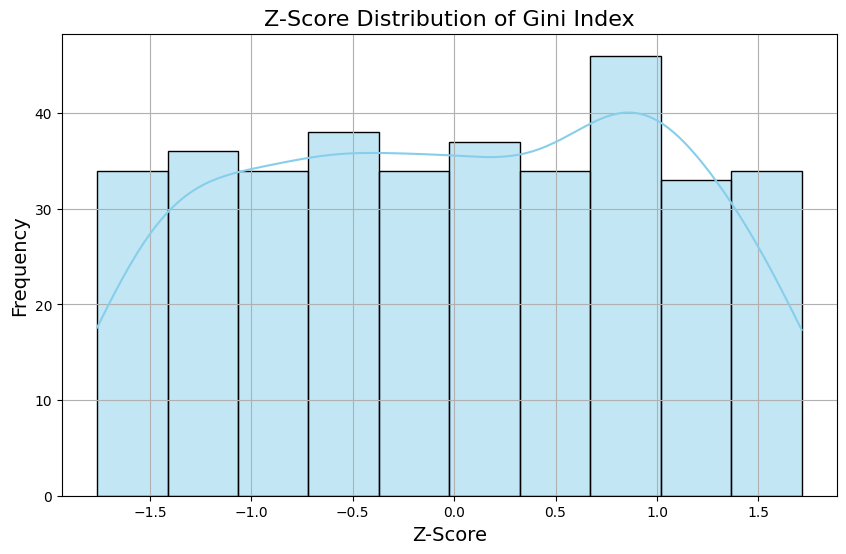

/nOutliers based on Z-Score:/nEmpty DataFrame
Columns: [Year, Gini Index, Z-Score]
Index: []


In [9]:
#Z-Score for Outlier Detection
df['Z-Score'] = (df['Gini Index'] - df['Gini Index'].mean()) / df['Gini Index'].std()
outliers_z = df[np.abs(df['Z-Score']) > 3]  

plt.figure(figsize=(10, 6))
sns.histplot(df['Z-Score'], kde=True, color='skyblue')
plt.title('Z-Score Distribution of Gini Index', fontsize=16)
plt.xlabel('Z-Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

print(f"/nOutliers based on Z-Score:/n{outliers_z[['Year', 'Gini Index', 'Z-Score']]}")

Skewness of Gini Index: -0.05821774407954671
Kurtosis of Gini Index (using Pearson definition): 1.8216325808100808


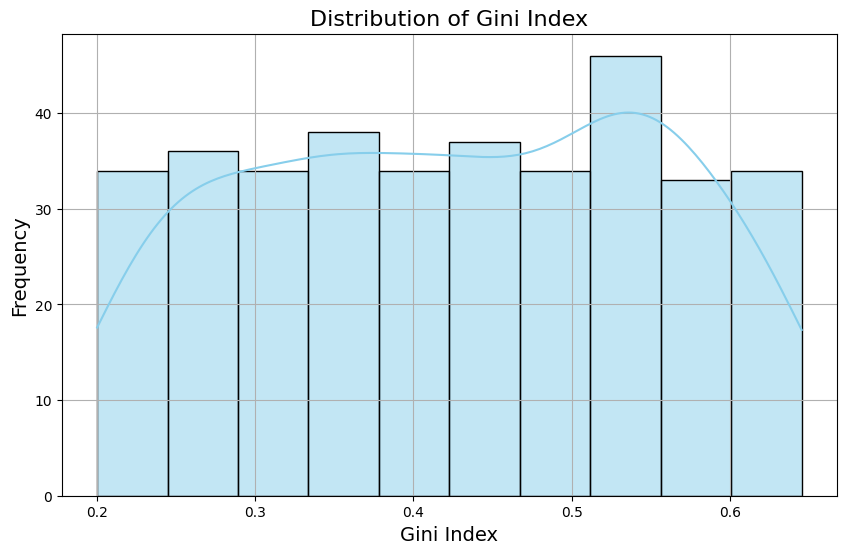

In [18]:
column = 'Gini Index'
from scipy.stats import zscore, kurtosis, skew
# 1. Skewness
gini_skewness = skew(df[column].dropna())
print(f"Skewness of {column}: {gini_skewness}")

# 2. Kurtosis
gini_kurtosis = kurtosis(df[column].dropna(), fisher=False)  
print(f"Kurtosis of {column} (using Pearson definition): {gini_kurtosis}")

# 3. Visualizing Skewness and Kurtosis using a distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df[column].dropna(), kde=True, color='skyblue')
plt.title(f'Distribution of {column}', fontsize=16)
plt.xlabel(column, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

MULTIVARIATE ANALYSIS

In [12]:
#Contingency Table
contingency_table = pd.crosstab(df['Income Group'], df['Country'])
print("\nContingency Table (Income Group vs Country):\n")
print(contingency_table)


Contingency Table (Income Group vs Country):

Country              Australia  Brazil  Canada  China  France  Germany  India  \
Income Group                                                                    
High Income                  9       8       8      7       6       12      5   
Low Income                   3       7       4      4       6        5      8   
Lower Middle Income          5       4       5      7       4        2      3   
Upper Middle Income          7       5       7      6       8        5      8   

Country              Japan  Mexico  Nigeria  Russia  Saudi Arabia  \
Income Group                                                        
High Income              4       8        4       8             5   
Low Income               8       5        8       4             8   
Lower Middle Income      5       6        5       8             7   
Upper Middle Income      7       5        7       4             4   

Country              South Africa  United Kingdom  

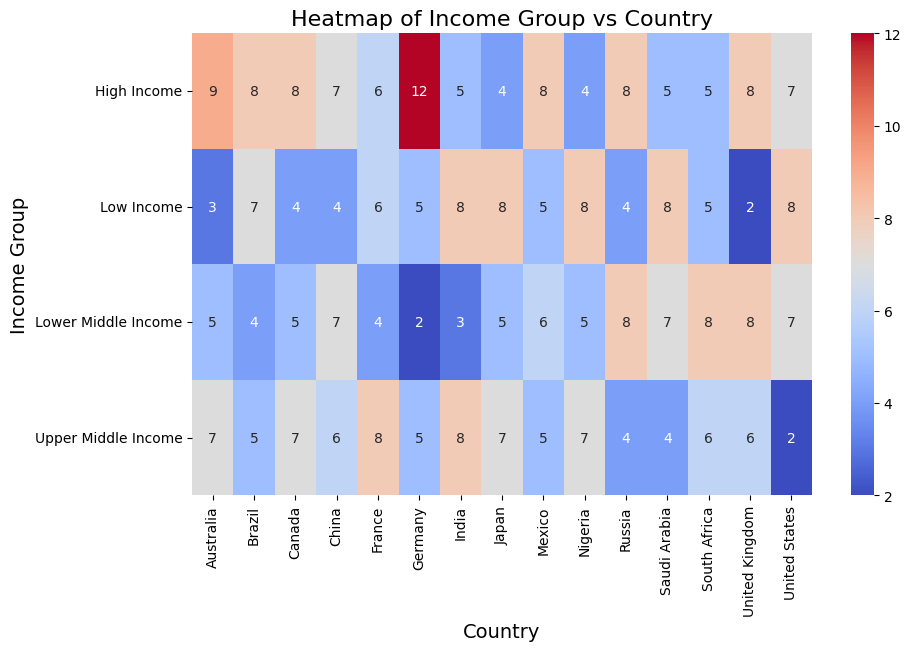

In [14]:
#Heatmap of Categorical Data (based on the contingency table)
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap of Income Group vs Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Income Group', fontsize=14)
plt.show()

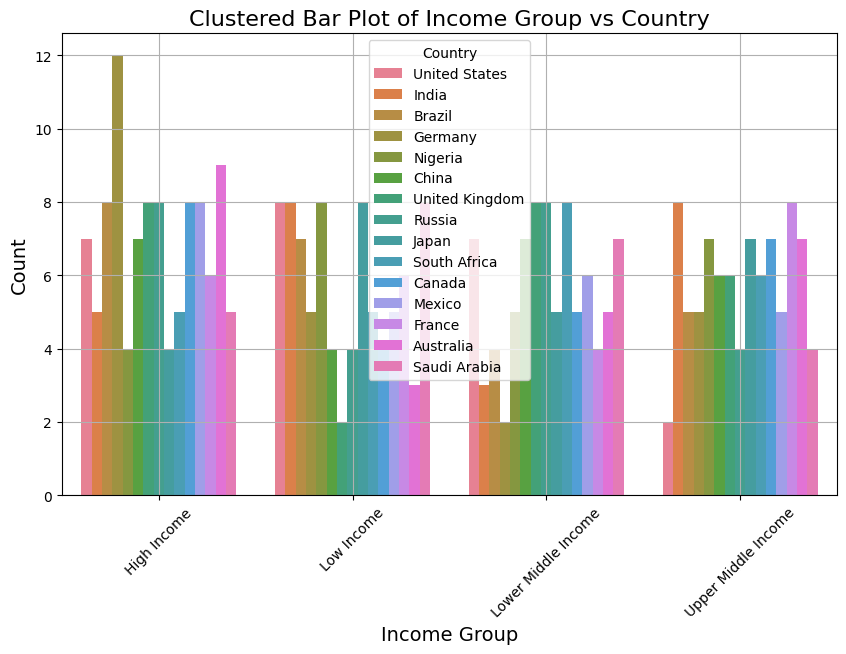

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Income Group', hue='Country', data=df)
plt.title('Clustered Bar Plot of Income Group vs Country', fontsize=16)
plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()